# cadCAD Experiment


In [1]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments

# from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline





time: 828 ms (started: 2021-08-09 16:24:48 -04:00)


In [2]:
from model import run

loaded GraphQL_data\SIstakeDelegateds.csv.
loaded GraphQL_data\SIstakeLockeds.csv.
loaded GraphQL_data\SIstakeWithdrawns.csv.
loaded GraphQL_data\SIallocationCloseds.csv.
loaded GraphQL_data\SIallocationCollecteds.csv.
running file: sim_setup.py
end of file: sim_setup.py
time: 203 ms (started: 2021-08-09 16:24:49 -04:00)


In [3]:
df = run.run()
import pickle
with open('experiment.p', 'wb') as f:
    pickle.dump(df, f)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 24, 1, 9)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
timestep=0 beginning...
timestep=1 beginning...
timestep=2 beginning...
timestep=3 beginning...
timestep=4 beginning...
timestep=5 beginning...
timestep=6 beginning...
timestep=7 beginning...
ACTION: DELEGATE (before)--
                delegator_id='0x63f8168f665f79101a0e0da2313cd1391e1c5e27', 
                pool_delegated_stake=Decimal('1243612'),
                shares=1243612,
                delegator.holdings=Decimal('10000000000'), 
                delegator.delegated_tokens=0, 
                delegator.undelegated_toke

In [4]:
df

,id_indexer,pool_delegated_stake,pool_locked_stake,shares,delegators,GRT,indexing_revenue,query_revenue,cumulative_non_indexer_revenue,simulation,subset,run,substep,timestep
5,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,1
10,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,2
15,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,3
20,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,4
25,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,indexer,1595804.523175385718557799346,0,1320143.793777818291801054281,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,0,0,1,5,86
435,indexer,1595804.523175385718557799346,0,1320143.793777818291801054281,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,0,0,1,5,87
440,indexer,1595804.523175385718557799346,0,1320143.793777818291801054281,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,0,0,1,5,88
445,indexer,1595804.523175385718557799346,0,1320143.793777818291801054281,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,0,0,1,5,89


time: 110 ms (started: 2021-08-09 16:24:49 -04:00)


# Revenue coming in each period.  
## Indexing rewards and query rewards come in as an event stream.

<AxesSubplot:>

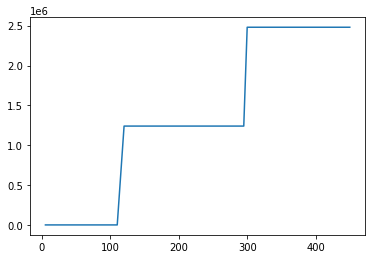

time: 437 ms (started: 2021-08-09 16:24:49 -04:00)


In [5]:
df.GRT.astype(float).plot()

<AxesSubplot:>

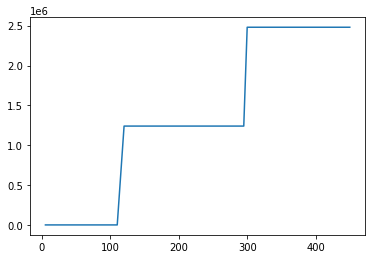

time: 203 ms (started: 2021-08-09 16:24:50 -04:00)


In [6]:
df.indexing_revenue.astype(float).plot()

<AxesSubplot:>

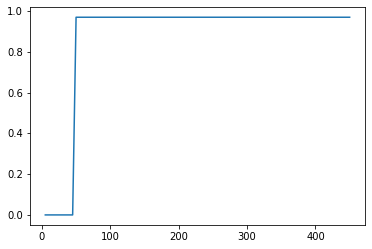

time: 156 ms (started: 2021-08-09 16:24:50 -04:00)


In [7]:
df.query_revenue.astype(float).plot()

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each delegator eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [8]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_holdings:
            delegator_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_holdings[delegator_id][timestep] = float(delegator.holdings)
        delegator_shares[delegator_id][timestep] = float(delegator.shares)
    timestep += 1

time: 47 ms (started: 2021-08-09 16:24:50 -04:00)


# Shares broken down by Delegator

In [9]:
delegator_shares

{'indexer': {0: 1243612.0,
  1: 1243612.0,
  2: 1243612.0,
  3: 1243612.0,
  4: 1243612.0,
  5: 1243612.0,
  6: 1243612.0,
  7: 1243612.0,
  8: 1243612.0,
  9: 1243612.0,
  10: 1243612.0,
  11: 1243612.0,
  12: 1243612.0,
  13: 1243612.0,
  14: 1243612.0,
  15: 1243612.0,
  16: 1243612.0,
  17: 1243612.0,
  18: 1243612.0,
  19: 1243612.0,
  20: 1243612.0,
  21: 1243612.0,
  22: 1243612.0,
  23: 1243612.0,
  24: 1243612.0,
  25: 1243612.0,
  26: 1243612.0,
  27: 1243612.0,
  28: 1243612.0,
  29: 1243612.0,
  30: 1243612.0,
  31: 1243612.0,
  32: 1243612.0,
  33: 1243612.0,
  34: 1243612.0,
  35: 1243612.0,
  36: 1243612.0,
  37: 1243612.0,
  38: 1243612.0,
  39: 1243612.0,
  40: 1243612.0,
  41: 1243612.0,
  42: 1243612.0,
  43: 1243612.0,
  44: 1243612.0,
  45: 1243612.0,
  46: 1243612.0,
  47: 1243612.0,
  48: 1243612.0,
  49: 1243612.0,
  50: 1243612.0,
  51: 1243612.0,
  52: 1243612.0,
  53: 1243612.0,
  54: 1243612.0,
  55: 1243612.0,
  56: 1243612.0,
  57: 1243612.0,
  58: 1243612

time: 78 ms (started: 2021-08-09 16:24:50 -04:00)


In [10]:
# resultset = [value for key, value in your_dict.items() if key not in your_blacklisted_set]

time: 47 ms (started: 2021-08-09 16:24:50 -04:00)


Text(0, 0.5, 'Delegator Shares')

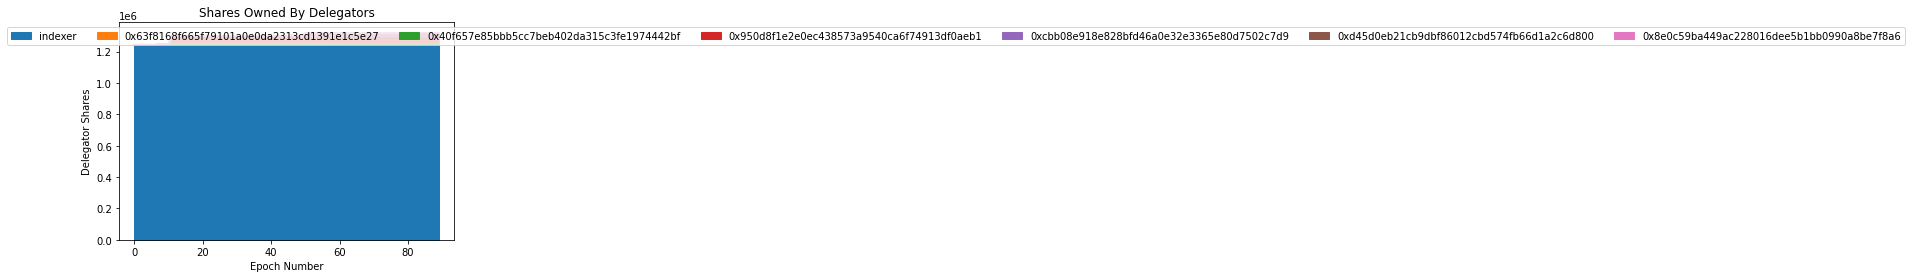

time: 328 ms (started: 2021-08-09 16:24:51 -04:00)


In [11]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

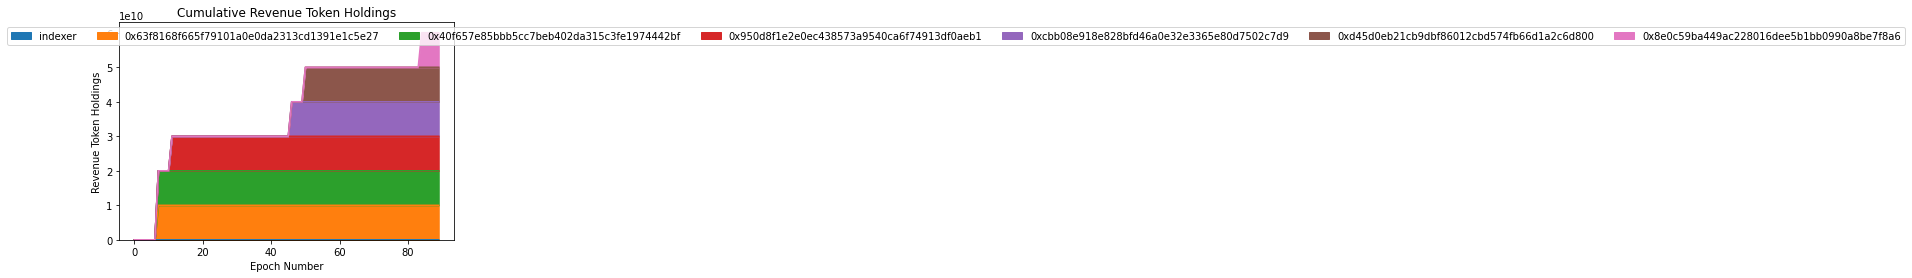

time: 438 ms (started: 2021-08-09 16:24:51 -04:00)


In [12]:
df_plot = pd.DataFrame(delegator_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [13]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 47 ms (started: 2021-08-09 16:24:51 -04:00)


In [14]:
df['total_shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 31 ms (started: 2021-08-09 16:24:52 -04:00)


In [15]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.total_shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 93 ms (started: 2021-08-09 16:24:52 -04:00)


In [16]:
shareholder_df

,shareholder,shares,Epoch Number
0,indexer,1243612,0
0,indexer,1243612,1
0,indexer,1243612,2
0,indexer,1243612,3
0,indexer,1243612,4
...,...,...,...
1,0x63f8168f665f79101a0e0da2313cd1391e1c5e27,4.8223000000E-14,89
2,0x40f657e85bbb5cc7beb402da315c3fe1974442bf,9.6370000001E-15,89
3,0x950d8f1e2e0ec438573a9540ca6f74913df0aeb1,55222.49526933200276521425489,89
4,0xd45d0eb21cb9dbf86012cbd574fb66d1a2c6d800,18007.97523240893971186226555,89


time: 62 ms (started: 2021-08-09 16:24:52 -04:00)


# Price per share

In [17]:
df.pool_delegated_stake[:20]

5                            1243612
10                           1243612
15                           1243612
20                           1243612
25                           1243612
30                           1243612
35                           1243612
40        1245701.500000000000000000
45        1245701.500000000000000000
50     1245701.606713762053234595765
55     1245701.606713762053234595765
60     1300924.106713762053234595765
65     1300924.106713762053234595765
70     1300924.106713762053234595765
75     1300924.106713762053234595765
80     1300924.106713762053234595765
85     1300924.106713762053234595765
90     1300924.106713762053234595765
95     1300924.106713762053234595765
100    1300924.106713762053234595765
Name: pool_delegated_stake, dtype: object

time: 62 ms (started: 2021-08-09 16:24:52 -04:00)


In [18]:
# df['period_revenue_per_share'] = df.period_revenue/df.shares
# df.period_revenue

time: 47 ms (started: 2021-08-09 16:24:52 -04:00)


# Revenue per share 

In [19]:
# df.period_revenue_per_share.plot()

time: 47 ms (started: 2021-08-09 16:24:52 -04:00)


In [20]:
df.columns

Index(['id_indexer', 'pool_delegated_stake', 'pool_locked_stake', 'shares',
       'delegators', 'GRT', 'indexing_revenue', 'query_revenue',
       'cumulative_non_indexer_revenue', 'simulation', 'subset', 'run',
       'substep', 'timestep', 'shareholders', 'total_shares'],
      dtype='object')

time: 47 ms (started: 2021-08-09 16:24:52 -04:00)


In [21]:
df

,id_indexer,pool_delegated_stake,pool_locked_stake,shares,delegators,GRT,indexing_revenue,query_revenue,cumulative_non_indexer_revenue,simulation,subset,run,substep,timestep,shareholders,total_shares
5,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,1,[indexer],[1243612]
10,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,2,[indexer],[1243612]
15,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,3,[indexer],[1243612]
20,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,4,[indexer],[1243612]
25,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,1,5,5,[indexer],[1243612]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,indexer,1595804.523175385718557799346,0,1320143.793777818291801054281,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,0,0,1,5,86,"[indexer, 0x63f8168f665f79101a0e0da2313cd1391e...","[1243612, 4.8223000000E-14, 9.6370000001E-15, ..."
435,indexer,1595804.523175385718557799346,0,1320143.793777818291801054281,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,0,0,1,5,87,"[indexer, 0x63f8168f665f79101a0e0da2313cd1391e...","[1243612, 4.8223000000E-14, 9.6370000001E-15, ..."
440,indexer,1595804.523175385718557799346,0,1320143.793777818291801054281,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,0,0,1,5,88,"[indexer, 0x63f8168f665f79101a0e0da2313cd1391e...","[1243612, 4.8223000000E-14, 9.6370000001E-15, ..."
445,indexer,1595804.523175385718557799346,0,1320143.793777818291801054281,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,0,0,1,5,89,"[indexer, 0x63f8168f665f79101a0e0da2313cd1391e...","[1243612, 4.8223000000E-14, 9.6370000001E-15, ..."


time: 79 ms (started: 2021-08-09 16:24:52 -04:00)
